In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv("C:\\Users\\msa72\\Downloads\\combined_network_data.csv")


# Preprocessing
attacks = ['BenignTraffic', 'Mirai-greeth_flood', 'Mirai-greip_flood', 'Mirai-udpplain']
df = df[df['label'].isin(attacks)]
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)
X = df.drop(['label'], axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create the base models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Create the stacking classifier
estimators = [
    ('knn', knn),
    ('rf', rf),
    ('dt', dt)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the validation set
stacking_predictions_val = stacking_model.predict(X_val)

# Calculate the accuracy of the stacking model on the validation set
accuracy_val = accuracy_score(y_val, stacking_predictions_val)

# Print the accuracy on the validation set
print(f"Stacking Model Accuracy on Validation Set: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
stacking_predictions_test = stacking_model.predict(X_test)

# Calculate the accuracy of the stacking model on the test set
accuracy_test = accuracy_score(y_test, stacking_predictions_test)

# Print the accuracy on the test set
print(f"Stacking Model Accuracy on Test Set: {accuracy_test * 100:.2f}%")


Stacking Model Accuracy on Validation Set: 99.84%
Stacking Model Accuracy on Test Set: 99.88%


In [5]:
# Display the number of all records in the original dataset
num_all_records = df.shape[0]
print(f"Number of all records in the original dataset: {num_all_records}")


Number of all records in the original dataset: 34642


In [3]:
# Count the number of records for each label in the 'label' column
label_counts = df['label'].value_counts()

# Filter the counts based on the specified attack labels
attack_counts = label_counts[label_counts.index.isin(attacks)]

# Display the counts for each attack label
for attack_label, count in attack_counts.items():
    print(f"Number of records for {attack_label}: {count}")


Number of records for BenignTraffic: 10099
Number of records for Mirai-greeth_flood: 9304
Number of records for Mirai-udpplain: 8168
Number of records for Mirai-greip_flood: 7071


In [4]:
# Display the number of records in the training, validation, and test sets
print(f"Number of records in the training set: {X_train.shape[0]}")
print(f"Number of records in the validation set: {X_val.shape[0]}")
print(f"Number of records in the test set: {X_test.shape[0]}")


Number of records in the training set: 20785
Number of records in the validation set: 6928
Number of records in the test set: 6929


In [80]:
# Inverse transform the standardized data
original_X_test = scaler.inverse_transform(X_test)

# Decode the predictions
predicted_labels_test = label_encoder.inverse_transform(stacking_predictions_test)

# Create a new DataFrame for the test set
df_test = pd.DataFrame(original_X_test, columns=X.columns)
df_test['actual_label'] = label_encoder.inverse_transform(y_test)
df_test['predicted_label'] = predicted_labels_test

# Identify flows indicating an attack in the test set
df_test['attack_detected'] = df_test['predicted_label'].isin(['Mirai-greeth_flood', 'Mirai-greip_flood', 'Mirai-udpplain'])

# Check lengths before saving
print("Length of Test DataFrame:", len(df_test))
print("Length of 'predicted_label' column in Test DataFrame:", len(df_test['predicted_label']))
print("Length of 'attack_detected' column in Test DataFrame:", len(df_test['attack_detected']))

# Save the data of test predictions to the CSV file
df_test.to_csv('C:\\Users\\msa72\\Downloads\\stacking_model_results.csv', index=False)

# Print a message indicating the successful creation of the CSV file
print("Test predictions saved to 'stacking_model_results.csv'")

Length of Test DataFrame: 6929
Length of 'predicted_label' column in Test DataFrame: 6929
Length of 'attack_detected' column in Test DataFrame: 6929
Test predictions saved to 'stacking_model_results.csv'


In [81]:
df= pd.read_csv('C:\\Users\\msa72\\Downloads\\stacking_model_results.csv')
df.head(60)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,actual_label,predicted_label,attack_detected
0,0.390865,413634.20,6.00,75.80,1379.891253,1379.891253,0.0,0.0,0.0,0.0,...,7.610023e-05,5.5,32.483112,1519.308072,1.662404e+06,0.70,38.50,BenignTraffic,BenignTraffic,False
1,0.013002,6.10,46.59,65.73,6.404722,6.404722,0.0,0.0,0.0,0.0,...,8.366388e+07,9.5,33.900134,17.126163,1.346251e+03,0.11,141.55,Mirai-greip_flood,Mirai-greip_flood,True
2,2.783970,3004065.00,17.00,64.00,1947.747307,1947.747307,0.0,0.0,0.0,0.0,...,8.375901e+07,9.5,33.286634,0.000000,0.000000e+00,0.00,141.55,Mirai-udpplain,Mirai-udpplain,True
3,0.016913,14.24,45.16,62.72,6.942423,6.942423,0.0,0.0,0.0,0.0,...,8.369380e+07,9.5,34.213970,33.835172,3.217502e+03,0.18,141.55,Mirai-greeth_flood,Mirai-greeth_flood,True
4,9.852454,847078.60,6.00,97.60,76.583716,76.583716,0.0,0.0,0.0,0.0,...,1.665234e+08,13.5,51.066113,1892.550487,1.796864e+06,1.00,244.60,BenignTraffic,BenignTraffic,False
5,0.653788,672600.32,17.00,64.00,1865.131757,1865.131757,0.0,0.0,0.0,0.0,...,8.378471e+07,9.5,33.286634,0.000000,0.000000e+00,0.00,141.55,Mirai-udpplain,Mirai-udpplain,True
6,3.801601,2421534.00,17.00,64.00,1148.491839,1148.491839,0.0,0.0,0.0,0.0,...,8.376752e+07,9.5,33.286634,0.000000,0.000000e+00,0.00,141.55,Mirai-udpplain,Mirai-udpplain,True
7,24.836599,518503.60,10.90,64.00,30.237781,30.237781,0.0,0.0,0.0,0.0,...,6.794289e-03,5.5,19.267408,469.015388,3.629252e+05,0.90,38.50,BenignTraffic,BenignTraffic,False
8,6.108220,539999.20,6.00,114.40,82.283597,82.283597,0.0,0.0,0.0,0.0,...,9.709910e-03,5.5,79.449965,5671.891314,1.827322e+07,0.90,38.50,BenignTraffic,BenignTraffic,False
9,0.334560,237497.26,16.62,65.69,1204.836543,1204.836543,0.0,0.0,0.0,0.0,...,8.378900e+07,9.5,32.727546,46.885773,4.703130e+03,0.25,141.55,Mirai-udpplain,Mirai-udpplain,True


In [104]:
#1. Model Performance Evaluation
attack_specific_metrics_test = classification_report(
    y_test,
    stacking_predictions_test,
    labels=label_encoder.transform(attacks),
    target_names=attacks
)

print("\nModel Performance Evaluation:")
print(attack_specific_metrics_test)


Model Performance Evaluation:
                    precision    recall  f1-score   support

     BenignTraffic       1.00      1.00      1.00      1981
Mirai-greeth_flood       1.00      1.00      1.00      1846
 Mirai-greip_flood       1.00      1.00      1.00      1429
    Mirai-udpplain       1.00      1.00      1.00      1673

          accuracy                           1.00      6929
         macro avg       1.00      1.00      1.00      6929
      weighted avg       1.00      1.00      1.00      6929




False Positive Rate (FPR) and False Negative Rate (FNR) Analysis on Test Set:
BenignTraffic: FPR=0.0006, FNR=0.0005
Mirai-greeth_flood: FPR=0.0007, FNR=0.0022
Mirai-greip_flood: FPR=0.0022, FNR=0.0007
Mirai-udpplain: FPR=0.0010, FNR=0.0012


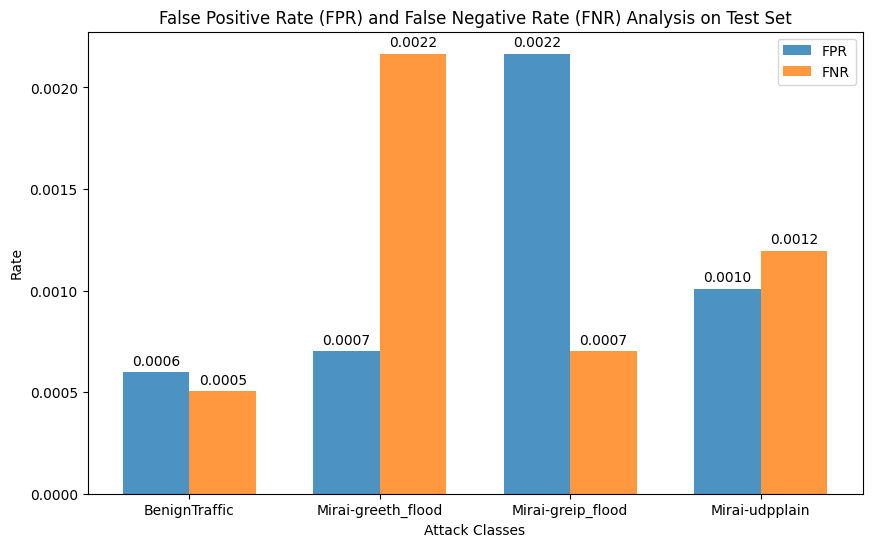

In [105]:
#2. False Positive and Negative Analysis
confusion_test = confusion_matrix(y_test, stacking_predictions_test)

fpr_per_class_test = {}
fnr_per_class_test = {}

for i, attack in enumerate(attacks):
    true_positives = confusion_test[i, i]
    false_positives = confusion_test[:, i].sum() - true_positives
    false_negatives = confusion_test[i, :].sum() - true_positives
    true_negatives = confusion_test[~i, ~i].sum()

    fpr = false_positives / (false_positives + true_negatives)
    fnr = false_negatives / (false_negatives + true_positives)

    fpr_per_class_test[attack] = fpr
    fnr_per_class_test[attack] = fnr

# Print FPR and FNR for each class on the test set
print("\nFalse Positive Rate (FPR) and False Negative Rate (FNR) Analysis on Test Set:")
for attack in attacks:
    print(f"{attack}: FPR={fpr_per_class_test[attack]:.4f}, FNR={fnr_per_class_test[attack]:.4f}")

# Bar chart
# Extract FPR and FNR values
fpr_values_test = [fpr_per_class_test[attack] for attack in attacks]
fnr_values_test = [fnr_per_class_test[attack] for attack in attacks]

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, fpr_values_test, bar_width, label='FPR', alpha=0.8)
bar2 = ax.bar([i + bar_width for i in index], fnr_values_test, bar_width, label='FNR', alpha=0.8)

# Labeling
ax.set_xlabel('Attack Classes')
ax.set_ylabel('Rate')
ax.set_title('False Positive Rate (FPR) and False Negative Rate (FNR) Analysis on Test Set')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(attacks)
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()

In [144]:
#3. Robustness and Sensitivity Testing
import numpy as np

# Function to add noise to the data
def add_noise(data, noise_level=0.001):
    noise = np.random.normal(0, noise_level, data.shape)
    noisy_data = data + noise
    return noisy_data

# Function to filter out noise from the data
def filter_noise(data, threshold=0.001):
    filtered_data = np.where(np.abs(data) < threshold, 0, data)
    return filtered_data


# Original model accuracy on the original test set
stacking_predictions_original = stacking_model.predict(X_test)
accuracy_original = accuracy_score(y_test, stacking_predictions_original)
print(f"Original Model Accuracy on Test Set: {accuracy_original * 100:.2f}%")

# Evaluate model accuracy after adding noise
noisy_X_test = add_noise(X_test)
stacking_predictions_noisy = stacking_model.predict(noisy_X_test)
accuracy_noisy = accuracy_score(y_test, stacking_predictions_noisy)
print(f"Model Accuracy on Noisy Test Set: {accuracy_noisy * 100:.2f}%")

# Evaluate model accuracy after filtering out noise
filtered_X_test = filter_noise(noisy_X_test)
stacking_predictions_filtered = stacking_model.predict(filtered_X_test)
accuracy_filtered = accuracy_score(y_test, stacking_predictions_filtered)
print(f"Model Accuracy on Filtered Test Set: {accuracy_filtered * 100:.2f}%")


Original Model Accuracy on Test Set: 99.88%
Model Accuracy on Noisy Test Set: 95.12%
Model Accuracy on Filtered Test Set: 95.14%


In [109]:
#3. Robustness and Sensitivity Testing
# Function to add noise to the data
def add_noise(data, noise_level=0.01):
    noise = truncnorm.rvs(-noise_level, noise_level, size=data.shape)
    return data + noise

# Function to conduct noise filtering
def filter_noise(model, X_data, y_data, noise_level=0.01):
    # Add noise to the input data
    noisy_X = add_noise(X_data, noise_level)

    # Make predictions on the noisy data
    noisy_predictions = model.predict(noisy_X)

    # Calculate accuracy on the noisy data
    accuracy_noisy = accuracy_score(y_data, noisy_predictions)

    return accuracy_noisy

# Set the noise level for testing
noise_level = 1  # Adjust this value based on experimentation

# Evaluate model accuracy after noise filtering on the original test set
filtered_accuracy_original = filter_noise(stacking_model, X_test, y_test, noise_level)
print(f"Model Accuracy after Noise Filtering on Original Test Set: {filtered_accuracy_original * 100:.2f}%")

# Evaluate model accuracy on the noisy test set
noisy_X_test = add_noise(X_test, noise_level)
noisy_predictions_test = stacking_model.predict(noisy_X_test)
noisy_accuracy_test = accuracy_score(y_test, noisy_predictions_test)
print(f"Model Accuracy on Noisy Test Set: {noisy_accuracy_test * 100:.2f}%")

# Evaluate model accuracy after noise filtering on a new noisy test set
filtered_accuracy_noisy = filter_noise(stacking_model, noisy_X_test, y_test, noise_level)
print(f"Model Accuracy after Noise Filtering on Noisy Test Set: {filtered_accuracy_noisy * 100:.2f}%")


Model Accuracy after Noise Filtering on Original Test Set: 64.60%
Model Accuracy on Noisy Test Set: 64.48%
Model Accuracy after Noise Filtering on Noisy Test Set: 58.19%


In [110]:
#3. Robustness and Sensitivity Testing
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import truncnorm
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to add noise to the data
def add_noise(data, noise_level=0.01):
    noise = truncnorm.rvs(-noise_level, noise_level, size=data.shape)
    return data + noise

# Function to conduct noise filtering
def filter_noise(model, X_data, y_data, noise_level=0.01):
    # Add noise to the input data
    noisy_X = add_noise(X_data, noise_level)

    # Make predictions on the noisy data
    noisy_predictions = model.predict(noisy_X)

    # Calculate accuracy on the noisy data
    accuracy_noisy = accuracy_score(y_data, noisy_predictions)
    
    return accuracy_noisy

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create the base models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Create the stacking classifier
estimators = [('knn', knn), ('rf', rf), ('dt', dt)]
stacking_model = StackingClassifier(estimators=estimators,
                                     final_estimator=RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the validation set
stacking_predictions_val = stacking_model.predict(X_val)

# Calculate the accuracy of the stacking model on the validation set
accuracy_val = accuracy_score(y_val, stacking_predictions_val)

# Print the accuracy on the validation set
print(f"Stacking Model Accuracy on Validation Set: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
stacking_predictions_test = stacking_model.predict(X_test)

# Print the original accuracy on the original test set
original_accuracy = accuracy_score(y_test, stacking_predictions_test)
print(f"Original Model Accuracy on Test Set: {original_accuracy * 100:.2f}%")

# Set the noise level for testing
noise_level = 1  # Adjust this value based on experimentation

# Evaluate model accuracy after noise filtering on the original test set
filtered_accuracy_original = filter_noise(stacking_model, X_test, y_test, noise_level)
print(f"Model Accuracy after Noise Filtering on Original Test Set: {filtered_accuracy_original * 100:.2f}%")

# Evaluate model accuracy on the noisy test set
noisy_X_test = add_noise(X_test, noise_level)
noisy_predictions_test = stacking_model.predict(noisy_X_test)
noisy_accuracy_test = accuracy_score(y_test, noisy_predictions_test)
print(f"Model Accuracy on Noisy Test Set: {noisy_accuracy_test * 100:.2f}%")

# Evaluate model accuracy after noise filtering on a new noisy test set
filtered_accuracy_noisy = filter_noise(stacking_model, noisy_X_test, y_test, noise_level)
print(f"Model Accuracy after Noise Filtering on Noisy Test Set: {filtered_accuracy_noisy * 100:.2f}%")

Stacking Model Accuracy on Validation Set: 99.84%
Original Model Accuracy on Test Set: 99.94%
Model Accuracy after Noise Filtering on Original Test Set: 99.86%
Model Accuracy on Noisy Test Set: 99.91%
Model Accuracy after Noise Filtering on Noisy Test Set: 99.87%


In [ ]:
# Chapter_4

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv("C:\\Users\\msa72\\Downloads\\combined_network_data.csv")

# Preprocessing
attacks = ['BenignTraffic', 'Mirai-greeth_flood', 'Mirai-greip_flood', 'Mirai-udpplain']
df = df[df['label'].isin(attacks)]
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)
X = df.drop(['label'], axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional, but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the validation set
knn_predictions_val = knn.predict(X_val)

# Calculate the accuracy of the KNN model on the validation set
accuracy_val = accuracy_score(y_val, knn_predictions_val)

# Print the accuracy on the validation set
print(f"KNN Model Accuracy on Validation Set: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
knn_predictions_test = knn.predict(X_test)

# Calculate the accuracy of the KNN model on the test set
accuracy_test = accuracy_score(y_test, knn_predictions_test)

# Print the accuracy on the test set
print(f"KNN Model Accuracy on Test Set: {accuracy_test * 100:.2f}%")


KNN Model Accuracy on Validation Set: 96.88%
KNN Model Accuracy on Test Set: 97.00%


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv("C:\\Users\\msa72\\Downloads\\combined_network_data.csv")

# Preprocessing
attacks = ['BenignTraffic', 'Mirai-greeth_flood', 'Mirai-greip_flood', 'Mirai-udpplain']
df = df[df['label'].isin(attacks)]
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)
X = df.drop(['label'], axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional, but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the training data
dt.fit(X_train, y_train)

# Make predictions on the validation set
dt_predictions_val = dt.predict(X_val)

# Calculate the accuracy of the Decision Tree model on the validation set
accuracy_val = accuracy_score(y_val, dt_predictions_val)

# Print the accuracy on the validation set
print(f"Decision Tree Model Accuracy on Validation Set: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
dt_predictions_test = dt.predict(X_test)

# Calculate the accuracy of the Decision Tree model on the test set
accuracy_test = accuracy_score(y_test, dt_predictions_test)

# Print the accuracy on the test set
print(f"Decision Tree Model Accuracy on Test Set: {accuracy_test * 100:.2f}%")


Decision Tree Model Accuracy on Validation Set: 99.31%
Decision Tree Model Accuracy on Test Set: 99.38%


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv("C:\\Users\\msa72\\Downloads\\combined_network_data.csv")

# Preprocessing
attacks = ['BenignTraffic', 'Mirai-greeth_flood', 'Mirai-greip_flood', 'Mirai-udpplain']
df = df[df['label'].isin(attacks)]
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)
X = df.drop(['label'], axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional, but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the validation set
rf_predictions_val = rf.predict(X_val)

# Calculate the accuracy of the Random Forest model on the validation set
accuracy_val = accuracy_score(y_val, rf_predictions_val)

# Print the accuracy on the validation set
print(f"Random Forest Model Accuracy on Validation Set: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
rf_predictions_test = rf.predict(X_test)

# Calculate the accuracy of the Random Forest model on the test set
accuracy_test = accuracy_score(y_test, rf_predictions_test)

# Print the accuracy on the test set
print(f"Random Forest Model Accuracy on Test Set: {accuracy_test * 100:.2f}%")


Random Forest Model Accuracy on Validation Set: 99.73%
Random Forest Model Accuracy on Test Set: 99.68%


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv("C:\\Users\\msa72\\Downloads\\combined_network_data.csv")

# Preprocessing
attacks = ['BenignTraffic', 'Mirai-greeth_flood', 'Mirai-greip_flood', 'Mirai-udpplain']
df = df[df['label'].isin(attacks)]
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)
X = df.drop(['label'], axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional, but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create the base models
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the hybrid model using VotingClassifier
hybrid_model = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('dt', dt),
        ('rf', rf)
    ],
    voting='hard'
)

# Fit the hybrid model on the training data
hybrid_model.fit(X_train, y_train)

# Make predictions on the validation set
hybrid_predictions_val = hybrid_model.predict(X_val)

# Calculate the accuracy of the hybrid model on the validation set
accuracy_val = accuracy_score(y_val, hybrid_predictions_val)

# Print the accuracy on the validation set
print(f"Hybrid Model Accuracy on Validation Set: {accuracy_val * 100:.2f}%")

# Make predictions on the test set
hybrid_predictions_test = hybrid_model.predict(X_test)

# Calculate the accuracy of the hybrid model on the test set
accuracy_test = accuracy_score(y_test, hybrid_predictions_test)

# Print the accuracy on the test set
print(f"Hybrid Model Accuracy on Test Set: {accuracy_test * 100:.2f}%")


Hybrid Model Accuracy on Validation Set: 99.65%
Hybrid Model Accuracy on Test Set: 99.64%
